In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib
%pip install igraph

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# The starter code is short and simple, take a look!
from starter import *
from starter import *
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import community
import igraph as ig
import leidenalg as la
import math

# Phase 1 - Create Inputs

In [3]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released
import random
def small(G: nx.Graph):
    # TODO add edges to complete the small input
#     G.add_nodes_from(np.arange(100))
    for i in range(100):
        for j in range(i+1, 100):
            G.add_edge(i,j, weight = random.randint(102,1000))
                
    return G
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
#     G.add_nodes_from(np.arange(300))
    for i in range(300):
        for j in range(i+1, 300, 5):
            G.add_edge(i,j, weight = random.randint(102,1000))
                
    return G
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
#     G.add_nodes_from(np.arange(1000))
    for i in range(1000):
        for j in range(i+100, 1000, 43):
            G.add_edge(i,j, weight = random.randint(102,1000))
                
    return G

In [4]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')
visualize(G)

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')
visualize(G)

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')
visualize(G)

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

# Phase 2 - Implement your Solver

In [4]:
def ig_of(G:nx.Graph) :
    return ig.Graph.from_networkx(G)
    
def nx_of(G:ig.Graph):
    return G.to_networkx()

def preprocessing(G: nx.Graph):
    for nodei in G.nodes:
        for nodej in G.nodes:
            if nodei != nodej:
                if (G.has_edge(nodei, nodej)):
                    G[nodei][nodej]['visited'] = 0
                else:
                    G.add_edge(nodei, nodej, weight = 0, visited = 0)
    for nodei in G.nodes:
        for nodej in G.nodes:
            if (nodei != nodej and G[nodei][nodej]['visited'] == 0):
                G[nodei][nodej]['weight'] = 1000 - G[nodei][nodej]['weight']
                G[nodei][nodej]['visited'] = 1
                
def print_distance(G: nx.Graph):
    distance_array = [[0 for i in range(G.number_of_nodes())] for i in range(G.number_of_nodes())]
    for node in G.nodes:
        for edge in G.edges(node):
            u, v = edge
            distance_array[u][v] = G[u][v]['weight']
    print(distance_array, "\n\n\n\n\n\n\n")

In [9]:
def assign_teams(G: nx.Graph, partitions):
    team_index = 1
    for partition in partitions:
        for node in partition:
            G.nodes[node]['team'] = team_index
        team_index = team_index + 1
        
def solve_for(G: nx.Graph, numTeams):
    iG = ig_of(G)
    partitions = la.PenguinVP(iG)
    index = 0
    for v in iG.vs:
        print(partitions.total_weight_in_all_comms())
        partitions.move_node(v.index, index);
        if (index == numTeams - 1):
            index = 0
        else:
            index = index + 1
        partitions.renumber_communities()
    
    print(partitions)
    
    for v in iG.vs:
        best_comm = min(range(numTeams), key = lambda c: partitions.diff_move(v.index, c))
        print(partitions.diff_move(v.index, best_comm))
        partitions.move_node(v.index, best_comm)
        
    for v in iG.vs:
        best_comm = min(range(numTeams), key = lambda c: partitions.diff_move(v.index, c))
        partitions.move_node(v.index, best_comm)
        
    for v in iG.vs:
        best_comm = min(range(numTeams), key = lambda c: partitions.diff_move(v.index, c))
        partitions.move_node(v.index, best_comm)
        
    print(partitions)
        
    return partitions
        
    


        

def solve(G: nx.Graph):
    iG = ig_of(G)
    partitions = la.PenguinVP(iG)
    index = 0
    numTeams = 5
    for v in iG.vs:
        partitions.move_node(v.index, index);
        print(partitions.total_weight_in_all_comms())
        if (index == numTeams - 1):
            index = 0
        else:
            index = index + 1
    partitions.renumber_communities()
    
    array = [1, 1, 1, 1, 1]
    print(partitions.quality())
    assign_teams(G, partitions)
    
    
    
#     while len(partitions) >= 10:
#     for i in range(250):
#         for v in iG.vs:
#             r = list(range(0, partitions._membership[v.index])) + list(range(partitions._membership[v.index]+1, len(partitions)))
#             best_comm = max(r, key=lambda c: partitions.diff_move(v.index, c))
#             partitions.move_node(v.index, best_comm);
#             partitions.renumber_communities();
    
#     for i in range(50):
        
#         for v in iG.vs:
#             best_comm = min(range(len(partitions)), key = lambda c: partitions.diff_move(v.index, c));
#             curr_quality = partitions.quality();
#             curr_diff = partitions.diff_move(v.index, best_comm);
#             partitions.move_node(v.index, best_comm);
#             partitions.renumber_communities();
#             print(partitions.quality() - curr_quality);
    
#     print(partitions)
#     print(partitions.quality())

#     num_decreases = partitions.graph.vcount()
#     print(partitions.graph.vcount())
#     while num_decreases >= 0.05 * partitions.graph.vcount():
#         num_decreases = 0
#         for v in iG.vs:
#             best_comm = min(range(numTeams), key = lambda c: partitions.diff_move(v.index, c))
#             if (partitions.diff_move(v.index, best_comm) < 0):
#                 num_decreases = num_decreases + 1
#             partitions.move_node(v.index, best_comm);
#         print(num_decreases)

#     return partitions
    
    
    
        


0.0
0.0
0.0
0.0
0.0
1.0
2.0
3.0
4.0
5.0
7.0
9.0
11.0
13.0
15.0
18.0
21.0
24.0
27.0
30.0
34.0
38.0
42.0
46.0
50.0
55.0
60.0
65.0
70.0
75.0
81.0
87.0
93.0
99.0
105.0
112.0
119.0
126.0
133.0
140.0
148.0
156.0
164.0
172.0
180.0
189.0
198.0
207.0
216.0
225.0
235.0
245.0
255.0
265.0
275.0
286.0
297.0
308.0
319.0
330.0
342.0
354.0
366.0
378.0
390.0
403.0
416.0
429.0
442.0
455.0
469.0
483.0
497.0
511.0
525.0
540.0
555.0
570.0
585.0
600.0
616.0
632.0
648.0
664.0
680.0
697.0
714.0
731.0
748.0
765.0
783.0
801.0
819.0
837.0
855.0
874.0
893.0
912.0
931.0
950.0
2169.2493960703473


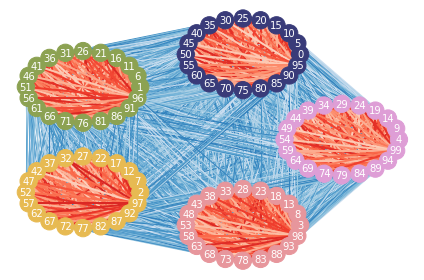

(529616, 1218.2493960703473, 1.0)


In [10]:
G = read_input('small.in')
solve(G)
visualize(G)
print(score(G, separated=True))

In [33]:
for i in range(1, 11):
    file = 'inputs/small' + str(i) + '.in'
    G_small = read_input(file)
    file = 'inputs/medium' + str(i) + '.in'
    G_medium = read_input(file)
    file = 'inputs/large' + str(i) + '.in'
    G_large = read_input(file)
    
    solve(G_small)
    print('small ', i, ' ', score(G_small))
    solve(G_medium)
    print('medium ', i, ' ', score(G_medium))
    solve(G_large)
    print('large ', i, ' ', score(G_large))
# score(G)

small  1   539416.2493960704
medium  1   728891.3408610913
large  1   233064.24939607034
small  2   527633.9404946218
medium  2   998489.8440658286
large  2   469723.3534567937
small  3   933219.2493960704
medium  3   1445219.2493960704
large  3   1004219.2493960704
small  4   485493.2493960704
medium  4   676086.2493960704
large  4   756081.2493960704
small  5   109282.24939607034
medium  5   71373.84406582857
large  5   84954.43643781355
small  6   113219.24939607034
medium  6   6220.4934642647595
large  6   1537.4434436573401
small  7   774460.2493960704
medium  7   811061.3408610913
large  7   320060.43643781357
small  8   386134.2493960704
medium  8   540386.6403407814
large  8   282875.3534567937
small  9   528215.2493960704
medium  9   561256.0204018223
large  9   242987.5951909783
small  10   421373.2493960704
medium  10   603939.1841232597
large  10   261012.4971679147


In [29]:
score(G)

51016.82818284591

In [58]:
# def solve(G: nx.Graph):
    
#     # TODO implement this function with your solver
#     # Assign a team to v with G.nodes[v]['team'] = team_id
#     # Access the team of v with team_id = G.nodes[v]['team']
# #     for vertex in G.nodes:
# #         G.nodes[vertex]['team'] = 1
# #     for edge in G.edges(0):
# #         print(G.edges[edge]['weight'])
# #     for ver
# #     distance_array = get_distance(G)
# #     clustering = AgglomerativeClustering(n_clusters = 5, affinity='precomputed', linkage = 'average')
# #     clustering.fit(distance_array)
# #     print(clustering.labels_)
#     print_distance(G)
#     min_cost = float('inf')
#     min_partition = []
#     for i in range(10):
#         partition = community.best_partition(G, randomize=True, resolution = 1)
#         for node in G.nodes: 
#             G.nodes[node]['team'] = partition[node]+1
#         curr_score = score(G)
#         if curr_score < min_cost:
#             min_cost = curr_score
#             min_partition = partition
    
#     for node in G.nodes:
#         G.nodes[node]['team'] = min_partition[node] + 1
        
# #     distance_array = get_distance(G)
# #     partition = DBSCAN(eps=150, metric='precomputed')
# #     partition.fit(distance_array)
# #     print(partition.labels_)
# #     for node in G.nodes:
# #         G.nodes[node]['team'] = partition[node]+1
        
# def get_distance(G: nx.Graph):
# #     print_distance(G)
# #     for node in G.nodes:
# #         for edge in G.edges(node):
# #             u, v = edge
# #             G[u][v]['visited'] = 0
#     for node in G.nodes:
#         for edge in G.edges(node):
#             u, v = edge
#             if (G[u][v]['visited'] == 0):
#                 G[u][v]['visited'] = 1
#                 G[u][v]['weight'] = 1000 - G[u][v]['weight']
#     print_distance(G)
                
# def print_distance(G: nx.Graph):
# #     distance_array = [[0 for i in range(G.number_of_nodes())] for i in range(G.number_of_nodes())]
#     for node in G.nodes:
#         for edge in G.edges(node):
#             u, v = edge
#             if G[u][v]['weight'] > 1:
#                 G[u][v]['weight'] = 1/G[u][v]['weight']
#             if G[u][v]['weight'] == 0:
#                 G[u][v]['weight'] = 1
# #             distance_array[u][v] = G[u][v]['weight']
# #     print(distance_array+"\n\n\n\n\n\n\n")
            
            
# #             distance_array[u][v] = G[u][v]['weight']
# #             if G[u][v]['weight'] > 1:
# #                 G[u][v]['weight'] = 1/G[u][v]['weight']
# #             if G[u][v]['weight'] == 0:
# #                 G[u][v]['weight'] = 1
# #     return distance_array
    
    


True


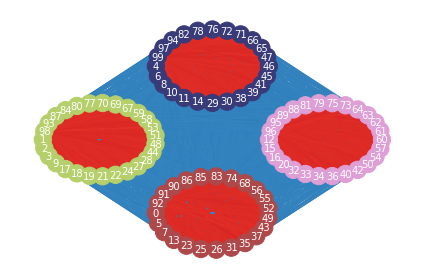

749.2476855633374

In [6]:
# for i in range(1, 100):
#     file = 'inputs/small' + str(i) + '.in'
#     G = read_input(file)
#     solve(G)
#     print(score(G))

G = read_input('inputs/small2.in')
# visualize(G)
solve(G)
print(validate_output(G))
visualize(G)
score(G)
# print(get_distance(G))
# solve(G)

In [7]:
# for i in range(100):
#     run(solve, 'inputs/small33.in', 'small.out', True)
    
#small 1 454
#small 2 511
#small 3 170
#small 4 38097.08015431938
score(G, separated=True)

(1.1935351359658457, 738.905609893065, 9.148540534306507)

In [59]:
run_all(solve, 'inputs', 'outputs', True)
tar('outputs', True)

  0%|          | 0/780 [00:00<?, ?it/s]

7
Clustering with 1000 elements and 7 clusters
[0] 0, 5, 18, 25, 42, 47, 65, 66, 73, 81, 89, 91, 97, 99, 117, 118, 119, 120,
    130, 136, 142, 149, 153, 168, 177, 189, 199, 202, 204, 209, 211, 213, 235,
    243, 246, 250, 253, 254, 257, 264, 266, 271, 274, 286, 288, 304, 307, 314,
    323, 331, 338, 386, 388, 390, 392, 397, 398, 406, 435, 448, 468, 500, 513,
    518, 521, 527, 528, 532, 533, 548, 550, 561, 563, 564, 569, 570, 573, 574,
    589, 593, 601, 604, 611, 624, 627, 631, 641, 644, 653, 654, 656, 661, 663,
    672, 682, 686, 694, 698, 703, 708, 718, 721, 732, 733, 736, 742, 743, 750,
    760, 767, 768, 775, 776, 780, 783, 784, 792, 796, 811, 829, 836, 849, 867,
    870, 874, 877, 878, 884, 886, 887, 904, 928, 934, 938, 962, 963, 969, 974,
    982, 985, 989, 996, 997
[1] 1, 4, 12, 15, 20, 26, 28, 37, 46, 64, 69, 74, 77, 84, 85, 87, 92, 93, 131,
    138, 143, 146, 156, 159, 162, 178, 181, 194, 205, 212, 216, 221, 222, 228,
    231, 237, 241, 261, 267, 269, 273, 279, 303, 305, 313

KeyboardInterrupt: 